In [1]:
from gvm_toolkit import GVMCombination

In [2]:
comb = GVMCombination('input_files/LHC_mass_combination.yaml')
print('mu_hat =', comb.fit_results['mu'])
print('CI =', comb.confidence_interval())
print('GoF =', comb.goodness_of_fit())


mu_hat = 172.51343427697154
CI = (172.18398115197184, 172.84280927697125, 0.3294140624997084)
GoF = 7.56418926359534


/Users/enzocanonero/Documents/PhD/tesi-codice/errors-on-errors/top-combination/code3.0/gvm_toolkit.py:177: UserWarning: Correlation matrix "ptmiss" asymmetric for measurements e and f: 0.36 vs 0.86
  warnings.warn(


In [3]:
comb.bartlett_correction()

(1.0001407681128438, 14.00020491969045)

In [4]:
comb.syst

{'LHCJES1': array([0.54, 0.33, 0.38, 0.35, 0.28, 0.4 , 0.77, 0.24, 0.69, 0.31, 0.1 ,
        0.16, 0.4 , 0.  , 0.11]),
 'LHCJES2': array([0.3 , 0.3 , 0.2 , 0.41, 0.39, 0.42, 0.54, 0.02, 0.35, 0.17, 0.12,
        0.19, 0.21, 0.  , 0.13]),
 'LHCJES3': array([0.43, 0.07, 0.24, 0.08, 0.05, 0.12, 0.06, 0.01, 0.08, 0.03, 0.01,
        0.02, 0.05, 0.  , 0.01]),
 'LHCbJES': array([0.68, 0.06, 0.62, 0.3 , 0.03, 0.34, 0.7 , 0.61, 0.49, 0.37, 0.32,
        0.29, 0.38, 0.  , 0.  ]),
 'LHCgJES': array([0.03, 0.28, 0.1 , 0.02, 0.21, 0.05, 0.  , 0.  , 0.  , 0.07, 0.08,
        0.02, 0.  , 0.  , 0.  ]),
 'LHClJES': array([0.02, 0.24, 0.02, 0.01, 0.1 , 0.06, 0.  , 0.  , 0.  , 0.04, 0.06,
        0.01, 0.07, 0.  , 0.  ]),
 'CMSJES': array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.58, 0.11, 0.58, 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  ]),
 'JER': array([0.19, 0.22, 0.01, 0.09, 0.2 , 0.1 , 0.14, 0.23, 0.15, 0.  , 0.03,
        0.02, 0.05, 0.  , 0.05]),
 'leptons': array([0.13, 0.04, 0.  , 0.14, 0.16, 0.01

In [5]:
info = comb.input_data()
comb.update_data(info)


In [6]:
info['syst']['LHCbJES']['epsilon'] = 0.6
comb.update_data(info)
comb.fit_results['mu']

172.57223124853678

In [7]:
info['data']['measurements']

{'a': {'central': 173.79, 'stat': 0.54},
 'b': {'central': 172.33, 'stat': 0.75},
 'c': {'central': 175.06, 'stat': 1.35},
 'd': {'central': 172.99, 'stat': 0.41},
 'e': {'central': 172.08, 'stat': 0.39},
 'f': {'central': 173.72, 'stat': 0.55},
 'g': {'central': 172.5, 'stat': 0.43},
 'h': {'central': 173.49, 'stat': 0.43},
 'i': {'central': 173.49, 'stat': 0.69},
 'j': {'central': 172.22, 'stat': 0.18},
 'k': {'central': 172.35, 'stat': 0.16},
 'l': {'central': 172.32, 'stat': 0.25},
 'm': {'central': 172.95, 'stat': 0.77},
 'n': {'central': 173.5, 'stat': 3.0},
 'o': {'central': 173.68, 'stat': 0.2}}

In [8]:
info['data']['V_stat'][0, 1] = 0.1
info['data']['V_stat'][1, 0] = 0.1


In [9]:
info['syst']['JER']

{'values': {'a': 0.19,
  'b': 0.22,
  'c': 0.01,
  'd': 0.09,
  'e': 0.2,
  'f': 0.1,
  'g': 0.14,
  'h': 0.23,
  'i': 0.15,
  'j': 0.0,
  'k': 0.03,
  'l': 0.02,
  'm': 0.05,
  'n': 0.0,
  'o': 0.05},
 'epsilon': 0.0,
 'corr': array([[ 1.  , -1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [-1.  ,  1.  , -1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 1.  , -1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  1.  ,  0.22, -0.08,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,  0.22,  1.  , -0.15,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  , -0.08, -0.15,  1.  ,  0.  ,  0.  ,  0.  ,
          0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  ,

In [10]:
info['syst']['JER']['values']['a']

0.19

In [11]:
info['syst']['JER']['corr'][0, 1]

-1.0

In [12]:
{k: v['epsilon'] for k, v in info['syst'].items()}

{'LHCJES1': 0.0,
 'LHCJES2': 0.0,
 'LHCJES3': 0.0,
 'LHCbJES': 0.6,
 'LHCgJES': 0.0,
 'LHClJES': 0.0,
 'CMSJES': 0.0,
 'JER': 0.0,
 'leptons': 0.0,
 'btag': 0.0,
 'ptmiss': 0.0,
 'pileup': 0.0,
 'trigger': 0.0,
 'ME': 0.0,
 'LHCrad': 0.0,
 'LHChad': 0.0,
 'CMSbHad': 0.0,
 'CR': 0.0,
 'UE': 0.0,
 'PDF': 0.0,
 'topPT': 0.0,
 'bkgData': 0.0,
 'bkgMC': 0.0,
 'method': 0.0,
 'other': 0.0}

In [13]:
comb.corr['JER'][:2, :2]

array([[ 1., -1.],
       [-1.,  1.]])

In [14]:
info['data']['measurements']['a']['stat'] += 0.1
info['data']['V_stat'][0,1] = 0.1
info['data']['V_stat'][1,0] = 0.1
info['syst']['JER']['values']['a'] += 0.05
info['syst']['JER']['corr'][0,1] = 0.3
info['syst']['JER']['corr'][1,0] = 0.3
info['syst']['JER']['epsilon'] = 0.1
comb.update_data(info)
comb.fit_results['mu']

172.56730455148758

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from gvm_toolkit import GVMCombination

comb = GVMCombination('input_files/LHC_mass_combination.yaml')
systematics = ['LHCbJES', 'btag', 'ME', 'LHCJES1', 'LHCJES2', 'method', 'CMSbHad', 'LHCrad']
eps_grid = np.linspace(0., 0.6, 7)

base_mu = comb.fit_results['mu']
base_ci = comb.confidence_interval()[2]

cv = {s: [] for s in systematics}
ci = {s: [] for s in systematics}

for syst in systematics:
    info = comb.input_data()
    for k in info['syst']:
        info['syst'][k]['epsilon'] = 0.0
    for eps in eps_grid:
        info['syst'][syst]['epsilon'] = eps
        comb.update_data(info)
        cv[syst].append(comb.fit_results['mu'])
        ci[syst].append(comb.confidence_interval()[2])

/Users/enzocanonero/Documents/PhD/tesi-codice/errors-on-errors/top-combination/code3.0/gvm_toolkit.py:177: UserWarning: Correlation matrix "ptmiss" asymmetric for measurements e and f: 0.36 vs 0.86
  warnings.warn(
/Users/enzocanonero/Documents/PhD/tesi-codice/errors-on-errors/top-combination/code3.0/gvm_toolkit.py:220: UserWarning: Negative eigenvalue -4.8319e-01 in systematic "btag"; adding 4.9319e-01 to diagonal for regularisation.
  warnings.warn(
/Users/enzocanonero/Documents/PhD/tesi-codice/errors-on-errors/top-combination/code3.0/gvm_toolkit.py:220: UserWarning: Negative eigenvalue -3.6380e-01 in systematic "LHCrad"; adding 3.7380e-01 to diagonal for regularisation.
  warnings.warn(


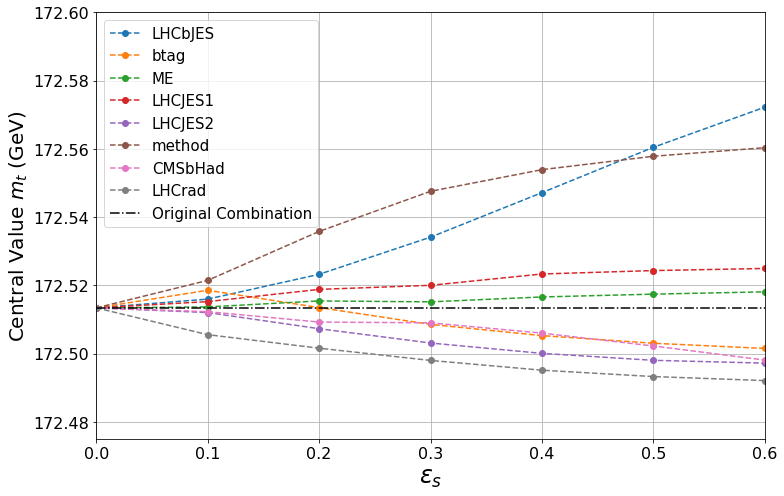

In [16]:
plt.figure(figsize=(11,7))
for s in systematics:
    plt.plot(eps_grid, cv[s], '--o', label=s)
plt.axhline(base_mu, color='black', linestyle='dashdot', label='Original Combination')
plt.xlabel(r'$\epsilon_s$', fontsize=24)
plt.ylabel('Central Value $m_t$ (GeV)', fontsize=20)
plt.xlim(0.0, 0.6)
plt.ylim(172.475, 172.6)
plt.legend(fontsize=15)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.show()


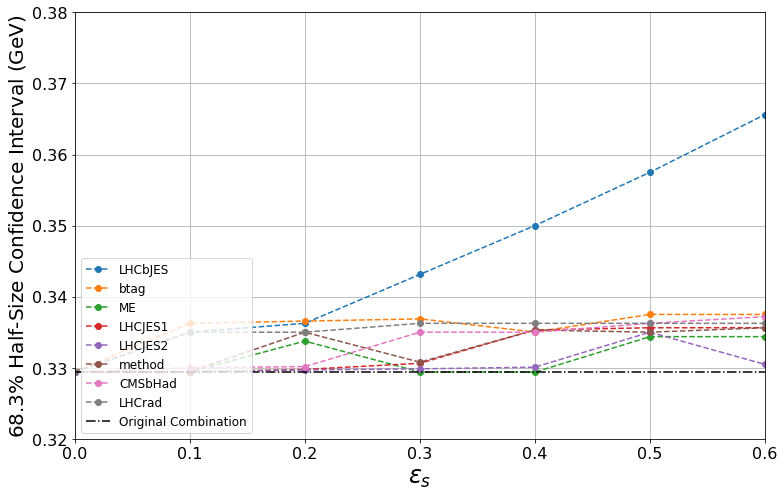

In [17]:
plt.figure(figsize=(11,7))
for s in systematics:
    plt.plot(eps_grid, ci[s], '--o', label=s)
plt.axhline(base_ci, color='black', linestyle='dashdot', label='Original Combination')
plt.xlabel(r'$\epsilon_s$', fontsize=24)
plt.ylabel('$68.3\%$ Half-Size Confidence Interval (GeV)', fontsize=20)
plt.xlim(0.0, 0.6)
plt.ylim(0.32, 0.38)
plt.legend(fontsize=12, loc='lower left')
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.show()